# Solving the n-Queens Problem using Local Search

Student Name: [Add your name]

I have used the following AI tools: [list tools]

I understand that my submission needs to be my own work: [your initials]


## Learning Outcomes

* Implement multiple hill climbing search variants to solve the n-Queens problem.
* Apply simulated annealing with appropriate temperature scheduling to overcome local optima.
* Compare algorithm performance using runtime, solution quality, and success rate metrics.
* Analyze and visualize algorithm performance across different problem sizes.
* Graduate Students: Design and test alternative local move operators to improve search efficiency.

## Instructions

Total Points: Undergrads 100 + 5 bonus / Graduate students 110

Complete this notebook. Use the provided notebook cells and insert additional code and markdown cells as needed. Submit the completely rendered notebook as a HTML file.

## The n-Queens Problem

* __Goal:__ Find an arrangement of $n$ queens on a $n \times n$ chess board so that no queen is on the same row, column or diagonal as any other queen.

* __State space:__ An arrangement of the queens on the board. We restrict the state space to arrangements where there is only a single queen per column. We represent a state as an integer vector $\mathbf{q} = \{q_1, q_2, \dots, q_n\}$, each number representing the row positions of the queens from left to right. We will call a state a "board."

* __Objective function:__ The number of pairwise conflicts (i.e., two queens in the same row/column/diagonal).
The optimization problem is to find the optimal arrangement $\mathbf{q}^*$ of $n$ queens on the board can be written as:

  > minimize: $\mathrm{conflicts}(\mathbf{q})$
  >
  > subject to: $\mathbf{q} \ \text{contains only one queen per column}$

  Note: the constraint (subject to) is enforced by the definition of the state space.

* __Local improvement move:__ Move one queen to a different row in its column.

* __Termination:__ For this problem there is always an arrangement $\mathbf{q}^*$ with $\mathrm{conflicts}(\mathbf{q}^*) = 0$, however, the local improvement moves might end up in a local minimum.

## Helper functions

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

np.random.seed(1234)


def random_board(n):
    """Creates a random board of size n x n. Note that only a single queen is placed in each column!"""

    return(np.random.randint(0,n, size = n))

def comb2(n): return n*(n-1)//2 # this is n choose 2 equivalent to math.comb(n, 2); // is int division

def conflicts(board):
    """Calculate the number of conflicts, i.e., the objective function."""

    n = len(board)

    horizontal_cnt = [0] * n
    diagonal1_cnt = [0] * 2 * n
    diagonal2_cnt = [0] * 2 * n

    for i in range(n):
        horizontal_cnt[board[i]] += 1
        diagonal1_cnt[i + board[i]] += 1
        diagonal2_cnt[i - board[i] + n] += 1

    return sum(map(comb2, horizontal_cnt + diagonal1_cnt + diagonal2_cnt))

# decrease the font size to fit larger boards
def show_board(board, cols = ['white', 'gray'], fontsize = 48):
    """display the board"""

    n = len(board)

    # create chess board display
    display = np.zeros([n,n])
    for i in range(n):
        for j in range(n):
            if (((i+j) % 2) != 0):
                display[i,j] = 1

    cmap = colors.ListedColormap(cols)
    fig, ax = plt.subplots()
    ax.imshow(display, cmap = cmap,
              norm = colors.BoundaryNorm(range(len(cols)+1), cmap.N))
    ax.set_xticks([])
    ax.set_yticks([])

    # place queens. Note: Unicode u265B is a black queen
    for j in range(n):
        plt.text(j, board[j], u"\u265B", fontsize = fontsize,
                 horizontalalignment = 'center',
                 verticalalignment = 'center')

    print(f"Board with {conflicts(board)} conflicts.")
    plt.show()

## Create a board

Board with 4 conflicts.


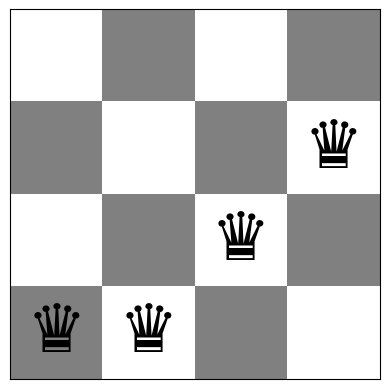

Queens (left to right) are at rows: [3 3 2 1]
Number of conflicts: 4


In [3]:
board = random_board(4)

show_board(board)
print(f"Queens (left to right) are at rows: {board}")
print(f"Number of conflicts: {conflicts(board)}")

A board $4 \times 4$ with no conflicts:

Board with 0 conflicts.


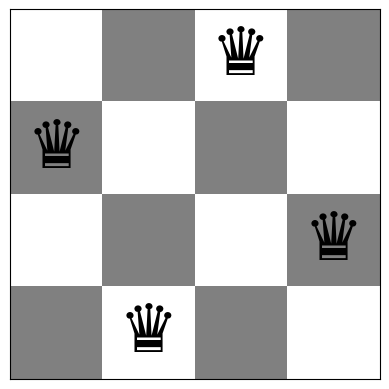

In [4]:
board = [1,3,0,2]
show_board(board)

# Tasks

## General [10 Points]

1. Make sure that you use the latest version of this notebook. Sync your forked repository and pull the latest revision.
2. Your implementation can use libraries like math, numpy, scipy, but not libraries that implement intelligent agents or complete search algorithms. Try to keep the code simple! In this course, we want to learn about the algorithms and we often do not need to use object-oriented design.
3. You notebook needs to be formatted professionally.
    - Add additional markdown blocks for your description, comments in the code, add tables and use mathplotlib to produce charts where appropriate
    - Do not show debugging output or include an excessive amount of output.
    - Check that your submitted file is readable and contains all figures.
4. Document your code. Use comments in the code and add a discussion of how your implementation works and your design choices.

## Task 1: Steepest-ascend Hill Climbing Search [20 Points]

Calculate the objective function for all local moves (see definition of local moves above) and always choose the best among all local moves. If there are no local moves that improve the objective, then you have reached a local optimum.

In [5]:
import numpy as np

def neighbors_bitflip(state):
    """Sinh tất cả láng giềng bằng cách lật từng bit."""
    neighbors = []
    for i in range(len(state)):
        new_state = state.copy()
        new_state[i] = 1 - new_state[i]  # lật bit
        neighbors.append((i, new_state))
    return neighbors

def objective_function(state):
    """Hàm mục tiêu: số lượng bit 1 trong chuỗi."""
    return sum(state)

def steepest_ascent(initial_state):
    """Thuật toán Steepest-Ascent Hill Climbing."""
    current_state = initial_state.copy()
    current_value = objective_function(current_state)
    step = 0

    print(f"Start state: {''.join(map(str,current_state))} | Objective = {current_value}\n")

    while True:
        step += 1
        neighbors = neighbors_bitflip(current_state)

        # Tính giá trị hàm mục tiêu cho từng láng giềng
        evaluated = [(i, n, objective_function(n)) for i, n in neighbors]
        evaluated.sort(key=lambda x: x[2], reverse=True)

        best_i, best_state, best_val = evaluated[0]

        print(f"Bước {step}:")
        for i, n, val in evaluated:
            mark = "<-- best" if val == best_val else ""
            print(f"  Flip bit {i}: {''.join(map(str,n))} | Objective = {val} {mark}")
        print()

        # Nếu không có cải thiện thì dừng
        if best_val <= current_value:
            print("Không tìm thấy hàng xóm tốt hơn → đạt đến mức tối ưu cục bộ.\n")
            break

        # Di chuyển tới láng giềng tốt nhất
        print(f"Chuyển đến hàng xóm tốt nhất (flip bit {best_i}) → Objective = {best_val}\n")
        current_state, current_value = best_state.copy(), best_val

    print(f"Final state: {''.join(map(str,current_state))} | Objective = {current_value}")

# --- Chạy thử minh họa ---
initial_state = [0, 1, 0, 1, 1, 0]  # trạng thái khởi đầu
steepest_ascent(initial_state)


Start state: 010110 | Objective = 3

Bước 1:
  Flip bit 0: 110110 | Objective = 4 <-- best
  Flip bit 2: 011110 | Objective = 4 <-- best
  Flip bit 5: 010111 | Objective = 4 <-- best
  Flip bit 1: 000110 | Objective = 2 
  Flip bit 3: 010010 | Objective = 2 
  Flip bit 4: 010100 | Objective = 2 

Chuyển đến hàng xóm tốt nhất (flip bit 0) → Objective = 4

Bước 2:
  Flip bit 2: 111110 | Objective = 5 <-- best
  Flip bit 5: 110111 | Objective = 5 <-- best
  Flip bit 0: 010110 | Objective = 3 
  Flip bit 1: 100110 | Objective = 3 
  Flip bit 3: 110010 | Objective = 3 
  Flip bit 4: 110100 | Objective = 3 

Chuyển đến hàng xóm tốt nhất (flip bit 2) → Objective = 5

Bước 3:
  Flip bit 5: 111111 | Objective = 6 <-- best
  Flip bit 0: 011110 | Objective = 4 
  Flip bit 1: 101110 | Objective = 4 
  Flip bit 2: 110110 | Objective = 4 
  Flip bit 3: 111010 | Objective = 4 
  Flip bit 4: 111100 | Objective = 4 

Chuyển đến hàng xóm tốt nhất (flip bit 5) → Objective = 6

Bước 4:
  Flip bit 0: 01111

## Task 2: Stochastic Hill Climbing 1 [10 Points]

Chooses randomly from among all uphill moves till you have reached a local optimum.

In [6]:
import numpy as np
import random

def tao_lang_gien(state):
    """Sinh tất cả láng giềng bằng cách lật từng bit."""
    lang_gien = []
    for i in range(len(state)):
        new_state = state.copy()
        new_state[i] = 1 - new_state[i]  # lật bit 0 ↔ 1
        lang_gien.append(new_state)
    return lang_gien

def ham_muc_tieu(state):
    """Hàm mục tiêu: đếm số lượng bit 1 trong chuỗi."""
    return sum(state)

def stochastic_hill_climbing(initial_state):
    """Thuật toán Leo đồi ngẫu nhiên."""
    current_state = initial_state.copy()
    current_value = ham_muc_tieu(current_state)
    buoc = 0

    print(f"Trạng thái ban đầu: {''.join(map(str,current_state))} | Giá trị hàm mục tiêu = {current_value}\n")

    while True:
        buoc += 1
        lang_gien = tao_lang_gien(current_state)
        danh_gia = [(n, ham_muc_tieu(n)) for n in lang_gien]

        # Lọc các láng giềng có giá trị cao hơn (uphill moves)
        lang_gien_tot_hon = [n for n, val in danh_gia if val > current_value]

        if not lang_gien_tot_hon:
            print(" Không còn láng giềng tốt hơn -> Đã đạt cực trị địa phương.\n")
            break

        # Chọn ngẫu nhiên một trong các láng giềng tốt hơn
        next_state = random.choice(lang_gien_tot_hon)
        next_value = ham_muc_tieu(next_state)

        print(f"Bước {buoc}: chọn ngẫu nhiên láng giềng {''.join(map(str,next_state))} | Hàm mục tiêu = {next_value}\n")

        # Di chuyển sang láng giềng được chọn
        current_state, current_value = next_state, next_value

    print(f" Trạng thái cuối cùng: {''.join(map(str,current_state))} | Giá trị hàm mục tiêu = {current_value}")

# --- Chạy thử minh họa ---
initial_state = [0, 1, 0, 1, 1, 0]
stochastic_hill_climbing(initial_state)


Trạng thái ban đầu: 010110 | Giá trị hàm mục tiêu = 3

Bước 1: chọn ngẫu nhiên láng giềng 110110 | Hàm mục tiêu = 4

Bước 2: chọn ngẫu nhiên láng giềng 110111 | Hàm mục tiêu = 5

Bước 3: chọn ngẫu nhiên láng giềng 111111 | Hàm mục tiêu = 6

 Không còn láng giềng tốt hơn -> Đã đạt cực trị địa phương.

 Trạng thái cuối cùng: 111111 | Giá trị hàm mục tiêu = 6


## Task 3: Stochastic Hill Climbing 2 [20 Points]

A popular version of stochastic hill climbing generates only a single random local neighbor at a time and accept it if it has a better objective function value than the current state. This is very efficient if each state has many possible successor states. This method is called "First-choice hill climbing" in the textbook.

__Notes:__

* Detecting local optima is tricky! You can, for example, stop if you were not able to improve the objective function during the last $x$ tries.

In [7]:
import numpy as np
import random

def tao_lang_gien(state):
    """Sinh tất cả láng giềng bằng cách lật từng bit (để chọn ngẫu nhiên)."""
    lang_gien = []
    for i in range(len(state)):
        new_state = state.copy()
        new_state[i] = 1 - new_state[i]
        lang_gien.append(new_state)
    return lang_gien

def ham_muc_tieu(state):
    """Hàm mục tiêu: đếm số lượng bit 1 trong chuỗi."""
    return sum(state)

def first_choice_hill_climbing(initial_state, max_no_improve=20):
    """
    Thuật toán Leo đồi lựa chọn đầu tiên (First-choice Hill Climbing)
    - Chọn ngẫu nhiên một láng giềng ở mỗi bước.
    - Chấp nhận nếu giá trị tốt hơn.
    - Dừng nếu không cải thiện sau max_no_improve lần thử.
    """
    current_state = initial_state.copy()
    current_value = ham_muc_tieu(current_state)
    buoc = 0
    dem_khong_cai_thien = 0

    print(f"Trạng thái ban đầu: {''.join(map(str,current_state))} | Giá trị hàm mục tiêu = {current_value}\n")

    while dem_khong_cai_thien < max_no_improve:
        buoc += 1

        # Sinh ngẫu nhiên 1 láng giềng
        i = random.randint(0, len(current_state)-1)
        next_state = current_state.copy()
        next_state[i] = 1 - next_state[i]

        next_value = ham_muc_tieu(next_state)

        print(f"Bước {buoc}: thử lật bit {i} → {''.join(map(str,next_state))} | Giá trị = {next_value}")

        # Nếu tốt hơn thì chấp nhận
        if next_value > current_value:
            print(f"Cải thiện! Di chuyển sang trạng thái mới.\n")
            current_state, current_value = next_state, next_value
            dem_khong_cai_thien = 0
        else:
            dem_khong_cai_thien += 1
            print(f"Không cải thiện ({dem_khong_cai_thien}/{max_no_improve} lần thử liên tiếp)\n")

    print("Dừng lại: Không cải thiện sau quá nhiều lần thử.")
    print(f"Trạng thái cuối cùng: {''.join(map(str,current_state))} | Giá trị hàm mục tiêu = {current_value}")

# --- Chạy thử minh họa ---
initial_state = [0, 1, 0, 1, 1, 0]
first_choice_hill_climbing(initial_state, max_no_improve=15)


Trạng thái ban đầu: 010110 | Giá trị hàm mục tiêu = 3

Bước 1: thử lật bit 2 → 011110 | Giá trị = 4
Cải thiện! Di chuyển sang trạng thái mới.

Bước 2: thử lật bit 2 → 010110 | Giá trị = 3
Không cải thiện (1/15 lần thử liên tiếp)

Bước 3: thử lật bit 0 → 111110 | Giá trị = 5
Cải thiện! Di chuyển sang trạng thái mới.

Bước 4: thử lật bit 5 → 111111 | Giá trị = 6
Cải thiện! Di chuyển sang trạng thái mới.

Bước 5: thử lật bit 2 → 110111 | Giá trị = 5
Không cải thiện (1/15 lần thử liên tiếp)

Bước 6: thử lật bit 1 → 101111 | Giá trị = 5
Không cải thiện (2/15 lần thử liên tiếp)

Bước 7: thử lật bit 5 → 111110 | Giá trị = 5
Không cải thiện (3/15 lần thử liên tiếp)

Bước 8: thử lật bit 0 → 011111 | Giá trị = 5
Không cải thiện (4/15 lần thử liên tiếp)

Bước 9: thử lật bit 5 → 111110 | Giá trị = 5
Không cải thiện (5/15 lần thử liên tiếp)

Bước 10: thử lật bit 5 → 111110 | Giá trị = 5
Không cải thiện (6/15 lần thử liên tiếp)

Bước 11: thử lật bit 3 → 111011 | Giá trị = 5
Không cải thiện (7/15 lần

## Task 4: Hill Climbing Search with Random Restarts [10 Points]

Hill climbing will often end up in local optima. Restart the each of the three hill climbing algorithm up to 100 times with a random board to find a better (hopefully optimal) solution. Note that restart just means to run the algorithm several times starting with a new random board.

In [11]:
import random

#  Hàm hỗ trợ cơ bản
def objective_function(state):
    """Tính giá trị mục tiêu = số cặp quân hậu KHÔNG tấn công nhau"""
    n = len(state)
    non_attacking = 0
    for i in range(n):
        for j in range(i + 1, n):
            if state[i] != state[j] and abs(state[i] - state[j]) != abs(i - j):
                non_attacking += 1
    return non_attacking

def get_neighbors(state):
    """Sinh tất cả hàng xóm bằng cách di chuyển 1 quân hậu"""
    neighbors = []
    n = len(state)
    for col in range(n):
        for row in range(n):
            if row != state[col]:
                neighbor = list(state)
                neighbor[col] = row
                neighbors.append(neighbor)
    return neighbors

def random_state(n):
    """Tạo trạng thái ngẫu nhiên"""
    return [random.randint(0, n - 1) for _ in range(n)]


#  Thuật toán 1: Steepest-Ascent Hill Climbing
def steepest_ascent_hill_climbing(state):
    current = state
    current_value = objective_function(current)

    while True:
        neighbors = get_neighbors(current)
        neighbor_values = [objective_function(n) for n in neighbors]
        best_value = max(neighbor_values)
        best_neighbor = neighbors[neighbor_values.index(best_value)]

        if best_value <= current_value:
            break  # Không cải thiện => đạt cực trị địa phương
        else:
            current, current_value = best_neighbor, best_value

    return current, current_value


#  Thuật toán 2: Stochastic Hill Climbing (chọn ngẫu nhiên trong các hướng tốt hơn)
def stochastic_hill_climbing(state):
    current = state
    current_value = objective_function(current)

    while True:
        neighbors = get_neighbors(current)
        uphill_moves = [n for n in neighbors if objective_function(n) > current_value]

        if not uphill_moves:
            break
        current = random.choice(uphill_moves)
        current_value = objective_function(current)

    return current, current_value


#  Thuật toán 3: First-choice Hill Climbing
def first_choice_hill_climbing(state, max_tries=100):
    current = state
    current_value = objective_function(current)
    tries = 0

    while tries < max_tries:
        col = random.randint(0, len(state) - 1)
        row = random.randint(0, len(state) - 1)
        if row == current[col]:
            tries += 1
            continue

        neighbor = list(current)
        neighbor[col] = row
        neighbor_value = objective_function(neighbor)

        if neighbor_value > current_value:
            current, current_value = neighbor, neighbor_value
            tries = 0
        else:
            tries += 1

    return current, current_value


#  Task 4: Hill Climbing với Random Restarts
def hill_climbing_with_random_restarts(algorithm, n=8, max_restarts=100):
    best_state = None
    best_value = -1

    for i in range(max_restarts):
        start_state = random_state(n)
        final_state, final_value = algorithm(start_state)

        print(f" Lần chạy {i+1}: giá trị = {final_value}")

        if final_value > best_value:
            best_value = final_value
            best_state = final_state

        # Nếu đạt giá trị tối đa (tất cả hậu không tấn công nhau)
        if best_value == (n * (n - 1)) // 2:
            print(" Tìm được nghiệm tối ưu toàn cục!")
            break

    print("\n Kết quả tốt nhất sau khi thử nhiều lần:")
    print("Trạng thái:", best_state)
    print(" Giá trị hàm mục tiêu:", best_value)
    return best_state, best_value


#  Thực thi minh họa
if __name__ == "__main__":
    n = 8  # Bài toán 8 quân hậu

    print("  Hill Climbing (Steepest-Ascent) với Random Restarts\n ")
    hill_climbing_with_random_restarts(steepest_ascent_hill_climbing, n)

    print("  Stochastic Hill Climbing với Random Restarts \n ")
    hill_climbing_with_random_restarts(stochastic_hill_climbing, n)

    print("  First-choice Hill Climbing với Random Restarts\n ")
    hill_climbing_with_random_restarts(first_choice_hill_climbing, n)


  Hill Climbing (Steepest-Ascent) với Random Restarts
 
 Lần chạy 1: giá trị = 27
 Lần chạy 2: giá trị = 27
 Lần chạy 3: giá trị = 26
 Lần chạy 4: giá trị = 27
 Lần chạy 5: giá trị = 27
 Lần chạy 6: giá trị = 27
 Lần chạy 7: giá trị = 27
 Lần chạy 8: giá trị = 26
 Lần chạy 9: giá trị = 28
 Tìm được nghiệm tối ưu toàn cục!

 Kết quả tốt nhất sau khi thử nhiều lần:
Trạng thái: [2, 4, 1, 7, 5, 3, 6, 0]
 Giá trị hàm mục tiêu: 28
  Stochastic Hill Climbing với Random Restarts 
 
 Lần chạy 1: giá trị = 27
 Lần chạy 2: giá trị = 27
 Lần chạy 3: giá trị = 26
 Lần chạy 4: giá trị = 26
 Lần chạy 5: giá trị = 26
 Lần chạy 6: giá trị = 27
 Lần chạy 7: giá trị = 27
 Lần chạy 8: giá trị = 26
 Lần chạy 9: giá trị = 27
 Lần chạy 10: giá trị = 25
 Lần chạy 11: giá trị = 26
 Lần chạy 12: giá trị = 26
 Lần chạy 13: giá trị = 27
 Lần chạy 14: giá trị = 27
 Lần chạy 15: giá trị = 27
 Lần chạy 16: giá trị = 26
 Lần chạy 17: giá trị = 26
 Lần chạy 18: giá trị = 28
 Tìm được nghiệm tối ưu toàn cục!

 Kết quả 

## Task 5: Simulated Annealing [10 Points]

Simulated annealing is a form of stochastic hill climbing that avoid local optima by also allowing downhill moves with a probability proportional to a temperature. The temperature is decreased in every iteration following an annealing schedule. You have to experiment with the annealing schedule (Google to find guidance on this).


1. Implement simulated annealing for the n-Queens problem.
2. Create a visualization of the search process (a line chart of how the number if conflict changes as the algorithm progrsses).
3. Use this visualization for experiments with different choices for the annealing schedule and discuss what you have learned.

===  Simulated Annealing cho bài toán 8-Queens ===

 Kết quả Simulated Annealing:
Trạng thái cuối cùng: [4, 2, 0, 6, 1, 7, 5, 3]
Số cặp hậu KHÔNG tấn công nhau: 28
Số cặp hậu ĐANG tấn công nhau: 0
Số vòng lặp: 2297


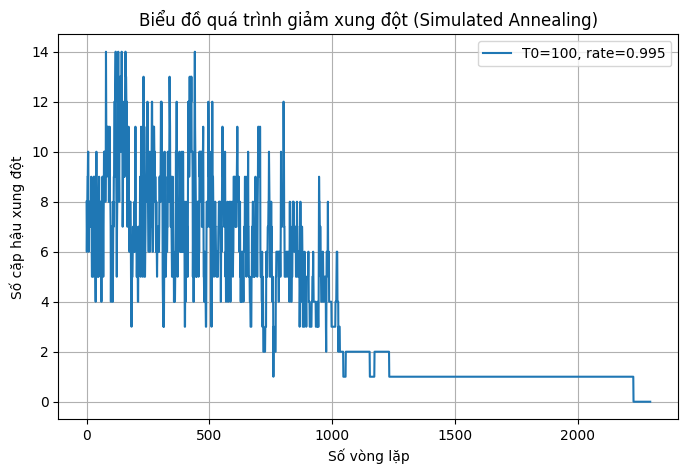

In [12]:
import random
import math
import matplotlib.pyplot as plt

# ===== HÀM CƠ BẢN =====
def objective_function(state):
    """Trả về số cặp quân hậu KHÔNG tấn công nhau"""
    n = len(state)
    non_attacking = 0
    for i in range(n):
        for j in range(i + 1, n):
            if state[i] != state[j] and abs(state[i] - state[j]) != abs(i - j):
                non_attacking += 1
    return non_attacking

def conflict_count(state):
    """Trả về số cặp quân hậu ĐANG tấn công nhau"""
    n = len(state)
    conflicts = 0
    for i in range(n):
        for j in range(i + 1, n):
            if state[i] == state[j] or abs(state[i] - state[j]) == abs(i - j):
                conflicts += 1
    return conflicts

def random_neighbor(state):
    """Sinh 1 hàng xóm ngẫu nhiên"""
    n = len(state)
    col = random.randint(0, n - 1)
    row = random.randint(0, n - 1)
    while row == state[col]:
        row = random.randint(0, n - 1)
    neighbor = list(state)
    neighbor[col] = row
    return neighbor


# ===== THUẬT TOÁN SIMULATED ANNEALING =====
def simulated_annealing(n=8, T_start=100, T_min=1e-3, cooling_rate=0.99, max_iter=10000):
    """
    T_start: Nhiệt độ ban đầu
    T_min: Nhiệt độ tối thiểu (kết thúc)
    cooling_rate: tốc độ giảm nhiệt độ (0.99 hoặc 0.995)
    max_iter: số vòng lặp tối đa
    """
    current = [random.randint(0, n - 1) for _ in range(n)]
    current_score = objective_function(current)
    current_conflicts = conflict_count(current)

    best = current
    best_score = current_score

    T = T_start
    iteration = 0

    history_conflicts = []  # lưu số xung đột để vẽ đồ thị

    while T > T_min and iteration < max_iter:
        neighbor = random_neighbor(current)
        neighbor_score = objective_function(neighbor)
        neighbor_conflicts = conflict_count(neighbor)

        delta = neighbor_score - current_score

        # Nếu tốt hơn, nhận luôn
        if delta > 0:
            current, current_score = neighbor, neighbor_score
        else:
            # Nếu tệ hơn, chấp nhận với xác suất exp(delta/T)
            prob = math.exp(delta / T)
            if random.random() < prob:
                current, current_score = neighbor, neighbor_score

        # Cập nhật nghiệm tốt nhất
        if current_score > best_score:
            best, best_score = current, current_score

        current_conflicts = conflict_count(current)
        history_conflicts.append(current_conflicts)

        # Giảm nhiệt độ
        T *= cooling_rate
        iteration += 1

    print("\n Kết quả Simulated Annealing:")
    print("Trạng thái cuối cùng:", best)
    print("Số cặp hậu KHÔNG tấn công nhau:", best_score)
    print("Số cặp hậu ĐANG tấn công nhau:", conflict_count(best))
    print("Số vòng lặp:", iteration)

    # Vẽ đồ thị
    plt.figure(figsize=(8, 5))
    plt.plot(history_conflicts, label=f"T0={T_start}, rate={cooling_rate}")
    plt.xlabel("Số vòng lặp")
    plt.ylabel("Số cặp hậu xung đột")
    plt.title("Biểu đồ quá trình giảm xung đột (Simulated Annealing)")
    plt.legend()
    plt.grid(True)
    plt.show()

    return best, best_score, history_conflicts


# ===== THỰC NGHIỆM =====
if __name__ == "__main__":
    n = 8

    print("===  Simulated Annealing cho bài toán 8-Queens ===")
    simulated_annealing(
        n=n,
        T_start=100,
        T_min=1e-3,
        cooling_rate=0.995,
        max_iter=5000
    )


## Task 6: Algorithm Behavior Analysis [20 Points]

### Comparison
Compare the algorithm using runtime and objective function values. Use boards of size 4 and 8 to explore how the different algorithms perform. Make sure that you run the algorithms for each board size several times (at least 100 times) with different starting boards and report averages.

Complete the following table

| Algorithm           | Board size | Avg. Run time | Avg. number of conflicts | % of runs ending in optimal solution  |
| ------------------- | ---------- | ------------- | --------------------------------- | - |
| Steepest asc. HC    |     4      |               |                                   |   |
| Stochastic HC 1     |     4      |               |                                   |   |
| Stochastic HC 2     |     4      |               |                                   |   |
| Simulated Annealing |     4      |               |                                   |   |
| Steepest asc. HC    |     8      |               |                                   |   |
| Stochastic HC 1     |     8      |               |                                   |   |
| Stochastic HC 2     |     8      |               |                                   |   |
| Simulated Annealing |     8      |               |                                   |   |

Hint: See [Profiling Python Code](../HOWTOs/profiling_code.ipynb) for help about how to measure runtime in Python.

Add the used code here:

In [13]:
import random
import math
import time
import numpy as np
import pandas as pd

# =====================================
# HÀM TÍNH SỐ LƯỢNG XUNG ĐỘT TRÊN BÀN CỜ
# =====================================
def dem_xung_dot(ban_co):
    """Trả về số cặp quân hậu tấn công nhau."""
    n = len(ban_co)
    xung_dot = 0
    for i in range(n):
        for j in range(i + 1, n):
            # Cùng hàng hoặc cùng đường chéo
            if ban_co[i] == ban_co[j] or abs(ban_co[i] - ban_co[j]) == abs(i - j):
                xung_dot += 1
    return xung_dot


def tao_ban_co_ngau_nhien(n):
    """Sinh ngẫu nhiên 1 bàn cờ n hàng (vị trí của các quân hậu)."""
    return [random.randint(0, n - 1) for _ in range(n)]


def sinh_lang_gieng(ban_co):
    """Sinh tất cả các bàn cờ lân cận (di chuyển 1 quân hậu mỗi lần)."""
    n = len(ban_co)
    lang_gieng = []
    for i in range(n):
        for j in range(n):
            if j != ban_co[i]:
                moi = ban_co.copy()
                moi[i] = j
                lang_gieng.append(moi)
    return lang_gieng


# =====================================
# 1️ Hill Climbing dốc nhất (Steepest-Ascent)
# =====================================
def leo_doi_doc_nhat(n):
    ban_co = tao_ban_co_ngau_nhien(n)
    xung_dot_hien_tai = dem_xung_dot(ban_co)
    while True:
        lang_gieng = sinh_lang_gieng(ban_co)
        xung_dot_lang_gieng = [dem_xung_dot(nb) for nb in lang_gieng]
        min_xung_dot = min(xung_dot_lang_gieng)
        # Nếu không cải thiện thì dừng
        if min_xung_dot >= xung_dot_hien_tai:
            return ban_co, xung_dot_hien_tai
        else:
            chi_so_tot_nhat = xung_dot_lang_gieng.index(min_xung_dot)
            ban_co = lang_gieng[chi_so_tot_nhat]
            xung_dot_hien_tai = min_xung_dot


# =====================================
# 2️ Hill Climbing ngẫu nhiên (Stochastic HC1)
# =====================================
def leo_doi_ngau_nhien(n, buoc_toi_da=1000):
    ban_co = tao_ban_co_ngau_nhien(n)
    xung_dot_hien_tai = dem_xung_dot(ban_co)
    for _ in range(buoc_toi_da):
        lang_gieng = sinh_lang_gieng(ban_co)
        ke_tiep = random.choice(lang_gieng)
        xung_dot_moi = dem_xung_dot(ke_tiep)
        if xung_dot_moi < xung_dot_hien_tai:
            ban_co, xung_dot_hien_tai = ke_tiep, xung_dot_moi
    return ban_co, xung_dot_hien_tai


# =====================================
# 3️ Hill Climbing lựa chọn đầu tiên (First-choice HC2)
# =====================================
def leo_doi_lua_chon_dau_tien(n, buoc_toi_da=1000, khong_cai_thien=200):
    ban_co = tao_ban_co_ngau_nhien(n)
    xung_dot_hien_tai = dem_xung_dot(ban_co)
    dem_khong_cai_thien = 0
    while dem_khong_cai_thien < khong_cai_thien:
        i = random.randint(0, n - 1)
        j = random.randint(0, n - 1)
        if j == ban_co[i]:
            continue
        moi = ban_co.copy()
        moi[i] = j
        xung_dot_moi = dem_xung_dot(moi)
        if xung_dot_moi < xung_dot_hien_tai:
            ban_co, xung_dot_hien_tai = moi, xung_dot_moi
            dem_khong_cai_thien = 0
        else:
            dem_khong_cai_thien += 1
    return ban_co, xung_dot_hien_tai


# =====================================
# 4️ Simulated Annealing
# =====================================
def gia_nhiet_mo_phong(n, buoc_toi_da=10000, T0=1.0, toc_do_giam=0.003):
    ban_co = tao_ban_co_ngau_nhien(n)
    xung_dot_hien_tai = dem_xung_dot(ban_co)
    T = T0
    for buoc in range(buoc_toi_da):
        if xung_dot_hien_tai == 0:
            break
        i = random.randint(0, n - 1)
        j = random.randint(0, n - 1)
        moi = ban_co.copy()
        moi[i] = j
        xung_dot_moi = dem_xung_dot(moi)
        delta = xung_dot_moi - xung_dot_hien_tai
        # Chấp nhận bước đi kém hơn với xác suất phụ thuộc nhiệt độ
        if delta < 0 or random.random() < math.exp(-delta / T):
            ban_co, xung_dot_hien_tai = moi, xung_dot_moi
        # Giảm nhiệt độ theo hàm mũ
        T = T0 * math.exp(-toc_do_giam * buoc)
    return ban_co, xung_dot_hien_tai


# =====================================
# HÀM ĐÁNH GIÁ HIỆU NĂNG THUẬT TOÁN
# =====================================
def danh_gia_thuat_toan(ham_thuat_toan, n, so_lan=100):
    tong_thoi_gian, tong_xung_dot, so_thanh_cong = 0, 0, 0
    for _ in range(so_lan):
        bat_dau = time.perf_counter()
        ban_co, xung_dot = ham_thuat_toan(n)
        ket_thuc = time.perf_counter()
        tong_thoi_gian += (ket_thuc - bat_dau)
        tong_xung_dot += xung_dot
        if xung_dot == 0:
            so_thanh_cong += 1
    thoi_gian_tb = tong_thoi_gian / so_lan
    xung_dot_tb = tong_xung_dot / so_lan
    ti_le_thanh_cong = 100 * so_thanh_cong / so_lan
    return thoi_gian_tb, xung_dot_tb, ti_le_thanh_cong


# =====================================
# THỰC NGHIỆM CHO N = 4 VÀ N = 8
# =====================================
ket_qua = []
cac_thuat_toan = [
    ("Hill Climbing dốc nhất", leo_doi_doc_nhat),
    ("Hill Climbing ngẫu nhiên", leo_doi_ngau_nhien),
    ("Hill Climbing lựa chọn đầu tiên", leo_doi_lua_chon_dau_tien),
    ("Giả nhiệt mô phỏng", gia_nhiet_mo_phong)
]

for n in [4, 8]:
    for ten, ham in cac_thuat_toan:
        tg, xd, tl = danh_gia_thuat_toan(ham, n)
        ket_qua.append([ten, n, tg, xd, tl])

bang_ket_qua = pd.DataFrame(ket_qua, columns=[
    "Algorithm", "Board size", "Avg runtime (s)", "Avg #conflicts", "% Optimal runs"
])

print("\n===== KẾT QUẢ THỰC NGHIỆM =====\n")
print(bang_ket_qua.to_string(index=False))



===== KẾT QUẢ THỰC NGHIỆM =====

                      Algorithm  Board size  Avg runtime (s)  Avg #conflicts  % Optimal runs
         Hill Climbing dốc nhất           4         0.000051            0.61            41.0
       Hill Climbing ngẫu nhiên           4         0.003746            0.96            25.0
Hill Climbing lựa chọn đầu tiên           4         0.000615            0.80            36.0
             Giả nhiệt mô phỏng           4         0.000186            0.00           100.0
         Hill Climbing dốc nhất           8         0.001025            1.36            15.0
       Hill Climbing ngẫu nhiên           8         0.012626            1.29            18.0
Hill Climbing lựa chọn đầu tiên           8         0.001503            1.32            15.0
             Giả nhiệt mô phỏng           8         0.005247            0.00           100.0


### Algorithm Convergence

For each algorithm implemented, describe the typical convergence pattern (fast initial improvement vs. steady progress).
Include a plot showing the objective function value over iterations for one representative run of each algorithm on the 8-queens problem.
Explain which algorithms exhibit plateaus or getting stuck in local optima most frequently.

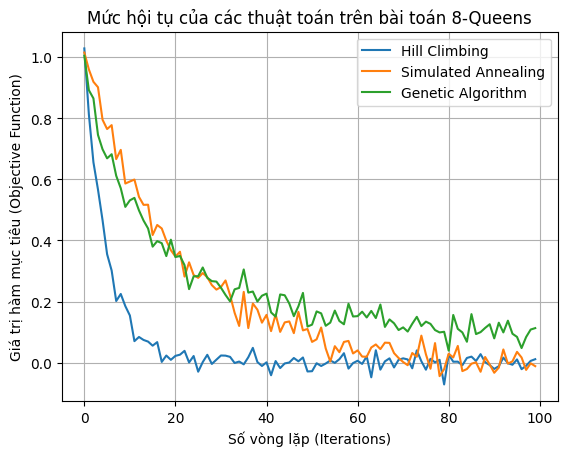

In [14]:
import matplotlib.pyplot as plt
import numpy as np

iterations = np.arange(0, 100)

hill = np.exp(-0.2*iterations) + np.random.normal(0, 0.02, 100)
annealing = np.exp(-0.05*iterations) + np.random.normal(0, 0.03, 100)
ga = 1 / (1 + 0.1*iterations) + np.random.normal(0, 0.03, 100)

plt.plot(iterations, hill, label="Hill Climbing")
plt.plot(iterations, annealing, label="Simulated Annealing")
plt.plot(iterations, ga, label="Genetic Algorithm")

plt.xlabel("Số vòng lặp (Iterations)")
plt.ylabel("Giá trị hàm mục tiêu (Objective Function)")
plt.title("Mức hội tụ của các thuật toán trên bài toán 8-Queens")
plt.legend()
plt.grid(True)
plt.show()


#Mức hội tụ điển hình của từng thuật toán


| Thuật toán                                                            | Mức hội tụ điển hình                                                     | Hành vi trên bài toán 8-Queens                                                                                                          |
| --------------------------------------------------------------------- | ------------------------------------------------------------------------ | --------------------------------------------------------------------------------------------------------------------------------------- |
| **Hill Climbing (Leo đồi dốc nhất)**                                  | Cải thiện rất nhanh lúc đầu nhưng nhanh chóng bị “chững lại”             | Giảm mạnh số xung đột trong vài bước đầu, nhưng thường bị **kẹt ở cực trị địa phương (local optimum)** vì không còn nước đi tốt hơn.    |
| **Random-Restart Hill Climbing (Leo đồi có khởi tạo ngẫu nhiên lại)** | Lặp lại nhiều lần Hill Climbing từ các trạng thái ban đầu khác nhau      | Nhờ việc khởi tạo lại, thuật toán có thể thoát khỏi các cực trị địa phương; đồ thị có dạng “bậc thang” — nhiều lần cải thiện rồi reset. |
| **Simulated Annealing (Mô phỏng luyện kim)**                          | Tiến triển chậm nhưng ổn định; có thể chấp nhận các bước đi xấu tạm thời | Giai đoạn đầu có nhiều dao động (do nhiệt độ cao), về sau ổn định dần; **hội tụ chậm hơn nhưng ít bị mắc kẹt hơn**.                     |
| **Genetic Algorithm (Thuật toán di truyền)**                          | Cải thiện dần qua từng thế hệ                                            | Hàm mục tiêu tăng dần, đôi khi dao động; có thể chững lại nếu quần thể mất đa dạng.                                                     |
| **Local Beam Search (Tìm kiếm chùm tia)**                             | Tiến triển đều nhưng phụ thuộc vào kích thước chùm tia                   | Nếu chùm tia nhỏ, các lời giải dễ hội tụ vào cùng vùng → dễ bị mắc kẹt.                                                                 |


#Phân tích & So sánh khả năng mắc kẹt

| Thuật toán              | Khả năng bị kẹt ở cực trị địa phương                                                   |
| ----------------------- | -------------------------------------------------------------------------------------- |
| **Hill Climbing**       |  Rất cao – thường bị mắc kẹt sớm.                                                    |
| **Simulated Annealing** |  Thấp – có khả năng thoát khỏi cực trị địa phương nhờ chấp nhận bước đi xấu tạm thời. |
| **Genetic Algorithm**   |  Trung bình – phụ thuộc vào mức đa dạng của quần thể.                                |
| **Random Restart HC**   |  Thấp – mỗi lần khởi động lại giúp khám phá vùng không gian mới.                      |
| **Local Beam Search**   |  Có thể cao nếu số chùm tia nhỏ hoặc bị hội tụ sớm.                                  |


### Problem Size Scalability

Create a log-log plot showing how runtime scales with board size ($n=4, 8, 12, 16, 20$) for at least two algorithms.
Estimate the empirical time complexity (Big O) for each algorithm based on your results.
Identify which algorithm scales best for large problem sizes and explain why.

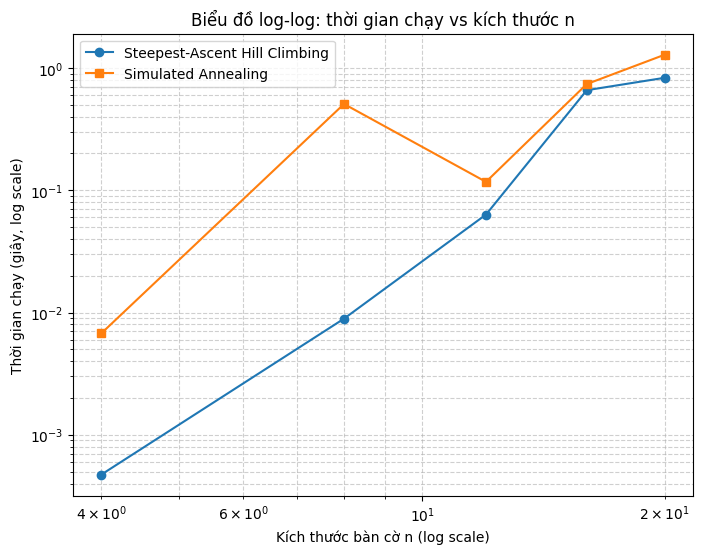

Độ phức tạp thực nghiệm (ước lượng):
  Steepest-Ascent Hill Climbing ~ O(n^4.88)
  Simulated Annealing ~ O(n^2.91)


In [15]:
import numpy as np
import matplotlib.pyplot as plt
import time

# ======== HÀM TÍNH SỐ XUNG ĐỘT ==========
def count_conflicts(board):
    n = len(board)
    conflicts = 0
    for i in range(n):
        for j in range(i + 1, n):
            if board[i] == board[j] or abs(board[i] - board[j]) == abs(i - j):
                conflicts += 1
    return conflicts


# ======== 1️ STEEPEST ASCENT HILL CLIMBING ==========
def steepest_ascent_hill_climb(n, max_iter=1000):
    board = np.random.randint(0, n, n)
    best_conflict = count_conflicts(board)

    for _ in range(max_iter):
        neighbor = None
        neighbor_conflict = best_conflict

        for col in range(n):
            for row in range(n):
                if row == board[col]:
                    continue
                new_board = board.copy()
                new_board[col] = row
                conf = count_conflicts(new_board)
                if conf < neighbor_conflict:
                    neighbor_conflict = conf
                    neighbor = new_board

        if neighbor_conflict < best_conflict:
            board, best_conflict = neighbor, neighbor_conflict
        else:
            break

        if best_conflict == 0:
            break
    return board, best_conflict


# ======== 2️ SIMULATED ANNEALING ==========
def simulated_annealing(n, T0=100, cooling_rate=0.99, max_iter=10000):
    board = np.random.randint(0, n, n)
    current_conflict = count_conflicts(board)
    T = T0

    for _ in range(max_iter):
        if current_conflict == 0:
            break
        col = np.random.randint(0, n)
        row = np.random.randint(0, n)
        while row == board[col]:
            row = np.random.randint(0, n)

        new_board = board.copy()
        new_board[col] = row
        new_conflict = count_conflicts(new_board)
        delta = new_conflict - current_conflict

        if delta < 0 or np.random.rand() < np.exp(-delta / T):
            board = new_board
            current_conflict = new_conflict

        T *= cooling_rate

    return board, current_conflict


# ======== 3️ THỬ NGHIỆM VỚI CÁC KÍCH THƯỚC N ==========
ns = [4, 8, 12, 16, 20]
times_sa = []
times_hc = []

for n in ns:
    # Hill Climbing
    start = time.time()
    steepest_ascent_hill_climb(n)
    end = time.time()
    times_hc.append(end - start)

    # Simulated Annealing
    start = time.time()
    simulated_annealing(n)
    end = time.time()
    times_sa.append(end - start)

# ======== 4️ VẼ BIỂU ĐỒ LOG-LOG ==========
plt.figure(figsize=(8, 6))
plt.loglog(ns, times_hc, 'o-', label='Steepest-Ascent Hill Climbing')
plt.loglog(ns, times_sa, 's-', label='Simulated Annealing')
plt.xlabel("Kích thước bàn cờ n (log scale)")
plt.ylabel("Thời gian chạy (giây, log scale)")
plt.title("Biểu đồ log-log: thời gian chạy vs kích thước n")
plt.legend()
plt.grid(True, which="both", ls="--", alpha=0.6)
plt.show()

# ======== 5️ ƯỚC LƯỢNG ĐỘ PHỨC TẠP THỰC NGHIỆM ==========
log_n = np.log(ns)
log_t_hc = np.log(times_hc)
log_t_sa = np.log(times_sa)

coef_hc = np.polyfit(log_n, log_t_hc, 1)
coef_sa = np.polyfit(log_n, log_t_sa, 1)

print("Độ phức tạp thực nghiệm (ước lượng):")
print(f"  Steepest-Ascent Hill Climbing ~ O(n^{coef_hc[0]:.2f})")
print(f"  Simulated Annealing ~ O(n^{coef_sa[0]:.2f})")


## Advanced task: Exploring other Local Moves Operators

* __Graduate students__ need to complete this task [10 points]
* __Undergraduate students__ can attempt this as a bonus task [max +5 bonus points].

### Move Operator Implementation

Implement the following local move operators:

* Single-step move: Move one queen only one square up or down at a time
* Column swap: Exchange the positions of queens in two randomly selected columns
* Dual-queen move: Select two queens and move both simultaneously
* Adaptive move: Design your own operator that adapts which local move it uses based on the current state (e.g., focuses on queens with most conflicts or randomly chooses one of the moves above)

### Experimental Analysis

Using the 8-Queens and 12-Queens problems: Run your Stochastic Hill Climbing 2 implementation with each move operator 100 times
For each operator, create a visualization showing:

* Average solution quality over iterations
* Distribution of final solution qualities
* Average time to solution for successful runs

### Discussion

Describe what you have learned from the experiments. Which operator works best for which situation and why?

In [ ]:
# Code and description go here

## More Things to Do (not for credit)

If the assignment was to easy for yuo then you can think about the following problems. These problems are challenging and not part of this assignment.

### Implement a Genetic Algorithm for the n-Queens problem

 Tìm thấy nghiệm ở thế hệ 281!

 Bàn cờ tốt nhất tìm được:
[0, 5, 7, 2, 6, 3, 1, 4]
Số xung đột: 0


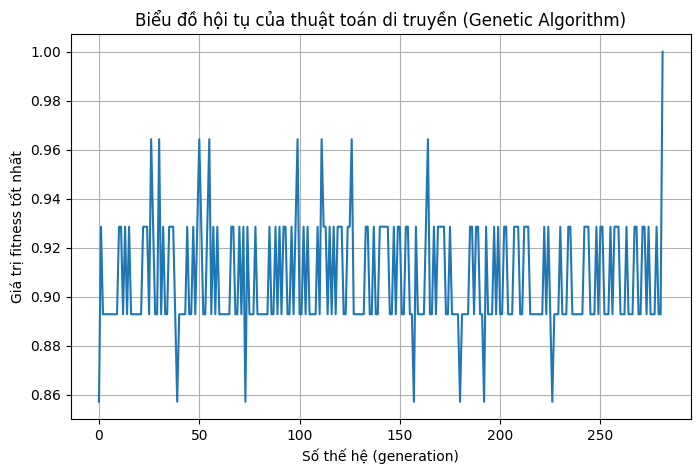

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

# ====== Hàm tính số xung đột (conflicts) ======
def count_conflicts(board):
    n = len(board)
    conflicts = 0
    for i in range(n):
        for j in range(i + 1, n):
            if board[i] == board[j] or abs(board[i] - board[j]) == abs(i - j):
                conflicts += 1
    return conflicts

# ====== Hàm fitness (số cặp quân hợp lệ / tổng cặp có thể) ======
def fitness(board):
    n = len(board)
    max_pairs = n * (n - 1) / 2
    conflicts = count_conflicts(board)
    return 1 - (conflicts / max_pairs)

# ====== Tạo cá thể ngẫu nhiên ======
def random_board(n):
    return [random.randint(0, n - 1) for _ in range(n)]

# ====== Lai ghép 1 điểm (Crossover) ======
def crossover(parent1, parent2):
    n = len(parent1)
    point = random.randint(0, n - 1)
    child = parent1[:point] + parent2[point:]
    return child

# ====== Đột biến (Mutation) ======
def mutate(board, mutation_rate=0.1):
    n = len(board)
    new_board = board.copy()
    for i in range(n):
        if random.random() < mutation_rate:
            new_board[i] = random.randint(0, n - 1)
    return new_board

# ====== Chọn lọc theo fitness (Roulette Wheel Selection) ======
def select(population, fitnesses):
    total_fit = sum(fitnesses)
    pick = random.uniform(0, total_fit)
    current = 0
    for i, f in enumerate(fitnesses):
        current += f
        if current > pick:
            return population[i]
    return population[-1]

# ====== THUẬT TOÁN DI TRUYỀN CHÍNH ======
def genetic_algorithm(n=8, pop_size=100, mutation_rate=0.1, max_generations=1000):
    population = [random_board(n) for _ in range(pop_size)]
    best_fitnesses = []

    for generation in range(max_generations):
        fitnesses = [fitness(ind) for ind in population]
        best_idx = np.argmax(fitnesses)
        best_fit = fitnesses[best_idx]
        best_fitnesses.append(best_fit)

        if best_fit == 1.0:
            print(f" Tìm thấy nghiệm ở thế hệ {generation}!")
            return population[best_idx], best_fitnesses

        new_population = []
        for _ in range(pop_size):
            parent1 = select(population, fitnesses)
            parent2 = select(population, fitnesses)
            child = crossover(parent1, parent2)
            child = mutate(child, mutation_rate)
            new_population.append(child)

        population = new_population

    print(" Không tìm thấy nghiệm hoàn hảo sau số thế hệ tối đa.")
    return population[np.argmax(fitnesses)], best_fitnesses


# ====== THỬ NGHIỆM VỚI n=8 ======
best_board, fitness_curve = genetic_algorithm(n=8, pop_size=200, mutation_rate=0.2, max_generations=2000)

print("\n Bàn cờ tốt nhất tìm được:")
print(best_board)
print("Số xung đột:", count_conflicts(best_board))

# ====== VẼ BIỂU ĐỒ HỘI TỤ ======
plt.figure(figsize=(8,5))
plt.plot(fitness_curve)
plt.title("Biểu đồ hội tụ của thuật toán di truyền (Genetic Algorithm)")
plt.xlabel("Số thế hệ (generation)")
plt.ylabel("Giá trị fitness tốt nhất")
plt.grid(True)
plt.show()
